# Init & Defaults

In [7]:
import matplotlib as plt
import pandas as pd
import numpy as np

colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"] # Should be colorblind friendly
cmap = plt.colors.ListedColormap(colors)
plt.rcParams.update({'font.size': 13, 'figure.figsize': (5,4), 'figure.constrained_layout.use': True})

path = '../tmp/'

# Number of policies vs context attrs.

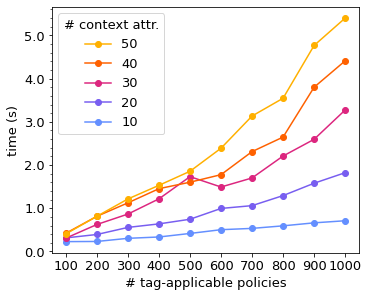

In [8]:
df = pd.read_csv(f'{path}exp-npol-ncon.csv', index_col=0, header=0).T
df.index = df.index.astype(int)
ax = df.plot(kind='line', marker='o', colormap=cmap)
ax.set_xlabel("# tag-applicable policies")
ax.set_ylabel("time (s)")
ax.xaxis.set_ticks(np.arange(min(df.index), max(df.index)+1, 100))
ax.yaxis.set_minor_locator(plt.ticker.AutoMinorLocator())
ax.yaxis.set_major_formatter(plt.ticker.FormatStrFormatter('%.1f'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='# context attr.', loc='upper left')
ax.get_figure().savefig(f'{path}exp-npol-ncon.pdf')

# Number of policies vs requirement attrs.

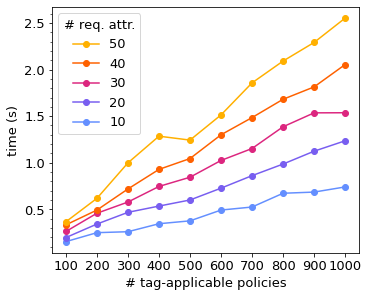

In [9]:
df = pd.read_csv(f'{path}exp-npol-nreq.csv', index_col=0, header=0).T
df.index = df.index.astype(int)
ax = df.plot(kind='line', marker='o', colormap=cmap)
ax.set_xlabel("# tag-applicable policies")
ax.set_ylabel("time (s)")
ax.xaxis.set_ticks(np.arange(min(df.index), max(df.index)+1, 100))
ax.yaxis.set_minor_locator(plt.ticker.AutoMinorLocator())
ax.yaxis.set_major_formatter(plt.ticker.FormatStrFormatter('%.1f'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='# req. attr.', loc='upper left')
ax.get_figure().savefig(f'{path}exp-npol-nreq.pdf')

# Number of context attrs., subtasks

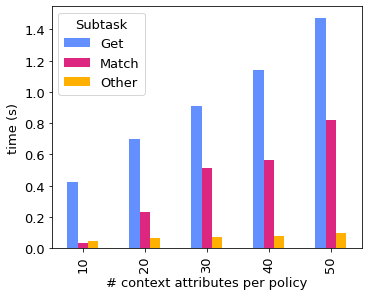

In [10]:
df_all = pd.read_csv(f'{path}exp-npol-ncon.csv', index_col=0, header=0).T
df_all.index = df_all.index.astype(int)
df_all.loc[500]

df_match = pd.read_csv(f'{path}exp-npol-ncon-matching.csv', index_col=0, header=0).T
df_match.index = df_match.index.astype(int)

df_get = pd.read_csv(f'{path}exp-npol-ncon-get-policies.csv', index_col=0, header=0).T
df_get.index = df_get.index.astype(int)

df = pd.concat([df_all.loc[600].rename('Total'), df_match.loc[600].rename('Match'), df_get.loc[600].rename('Get')], axis=1)
df['Other'] = df['Total'] - df['Match'] - df['Get']
df.index = df.index.astype(int)

ax = df.plot.bar(y=['Get', 'Match', 'Other'], colormap=cmap)
ax.set_xlabel("# context attributes per policy")
ax.set_ylabel("time (s)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Subtask", loc='upper left')
ax.get_figure().savefig(f'{path}exp-ncon-subtasks.pdf')

# Number of policies, log scale

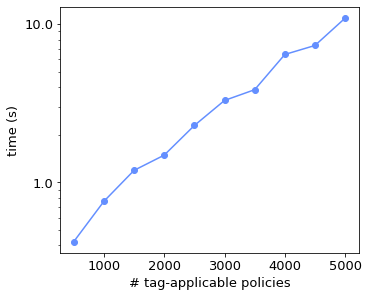

In [11]:
df = pd.read_csv(f'{path}exp-npol.csv', index_col=0, header=0).T
df.index = df.index.astype(int)

ax = df.plot(kind='line', marker='o', colormap=cmap, logy=True)
ax.set_xlabel("# tag-applicable policies")
ax.set_ylabel("time (s)")
ax.yaxis.set_major_formatter(plt.ticker.FormatStrFormatter('%.1f'))
ax.get_legend().remove()
ax.get_figure().savefig(f'{path}exp-npol.pdf')

# Number of policies, subtasks

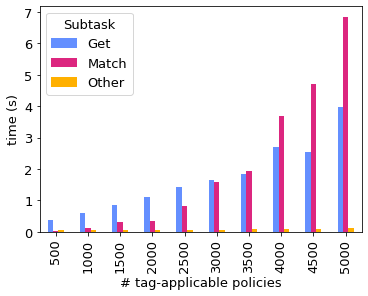

In [12]:
df_all = pd.read_csv(f'{path}exp-npol.csv', index_col=0, header=0).T
df_all.index = df_all.index.astype(int)

df_match = pd.read_csv(f'{path}exp-npol-matching.csv', index_col=0, header=0).T
df_match.index = df_match.index.astype(int)

df_get = pd.read_csv(f'{path}exp-npol-get-policies.csv', index_col=0, header=0).T
df_get.index = df_get.index.astype(int)

df = pd.concat([df_all[0].rename('Total'), df_match[0].rename('Match'), df_get[0].rename('Get')], axis=1)
df['Other'] = df['Total'] - df['Match'] - df['Get']
df.index = df.index.astype(int)

ax = df.plot.bar(y=['Get', 'Match', 'Other'], colormap=cmap)
ax.set_xlabel("# tag-applicable policies")
ax.set_ylabel("time (s)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Subtask", loc='upper left')
ax.get_figure().savefig(f'{path}exp-npol-subtasks.pdf')